## Compare K-means with different data

#### 4 sets of data with different shapes are generated

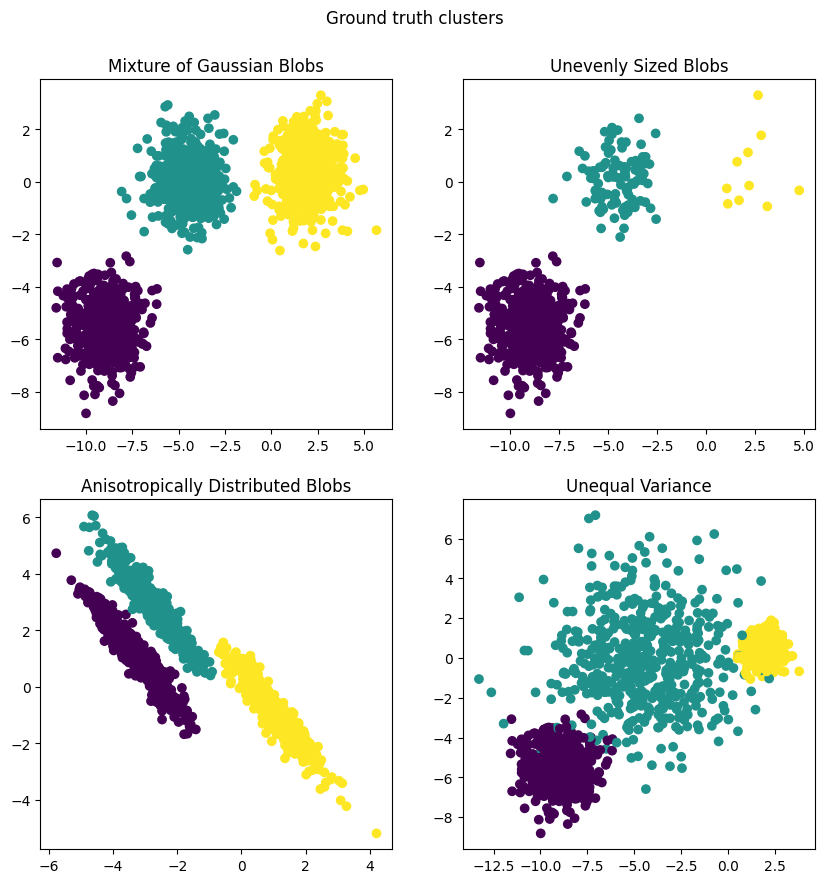

In [1]:
import numpy as np

from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

axs[0, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[0, 1].set_title("Unevenly Sized Blobs")

axs[1, 0].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[1, 0].set_title("Anisotropically Distributed Blobs") #properties vary with the direction: eliptic blobs

axs[1, 1].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 1].set_title("Unequal Variance")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

### Wrong options

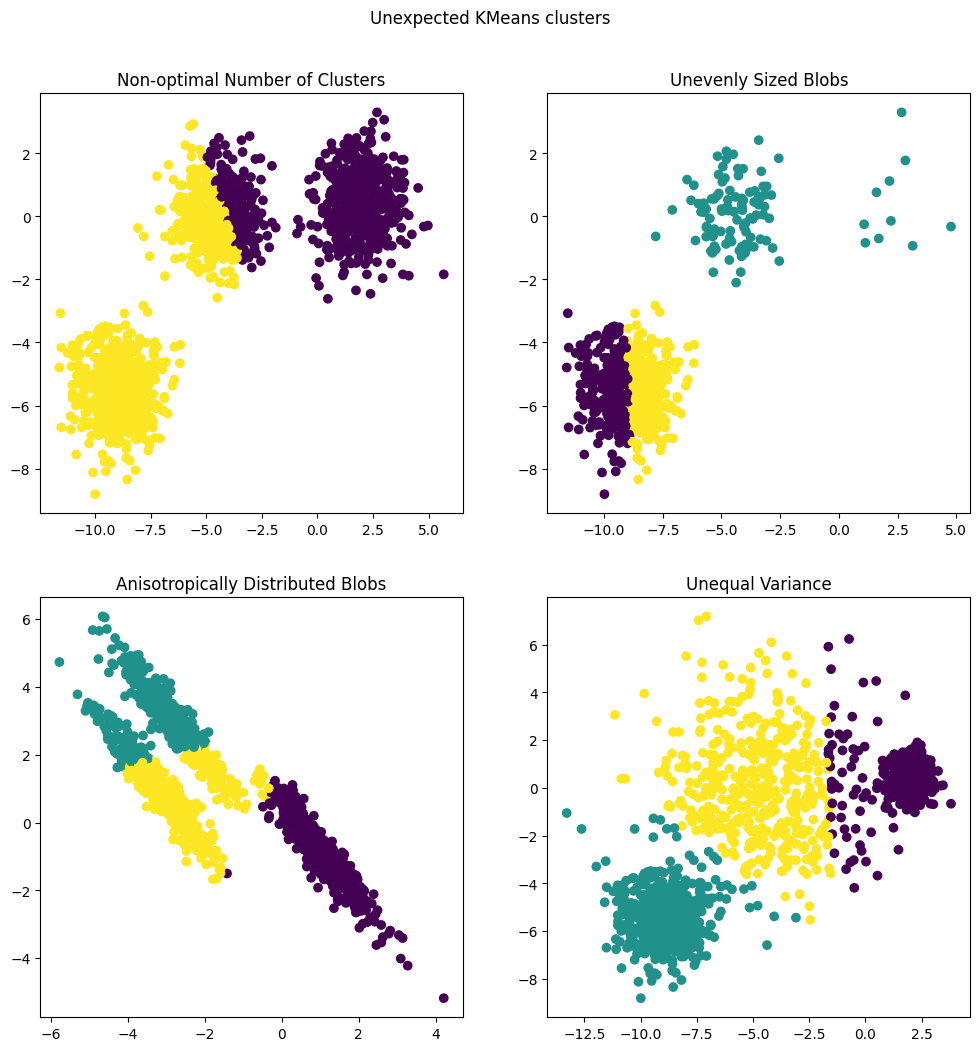

In [2]:
from sklearn.cluster import KMeans

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Non-optimal Number of Clusters")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_filtered)
axs[0, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[0, 1].set_title("Unevenly Sized Blobs")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)
axs[1, 0].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[1, 0].set_title("Anisotropically Distributed Blobs") 

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_varied)
axs[1, 1].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 1].set_title("Unequal Variance")

plt.suptitle("Unexpected KMeans clusters").set_y(0.95)
plt.show()

### Solutions

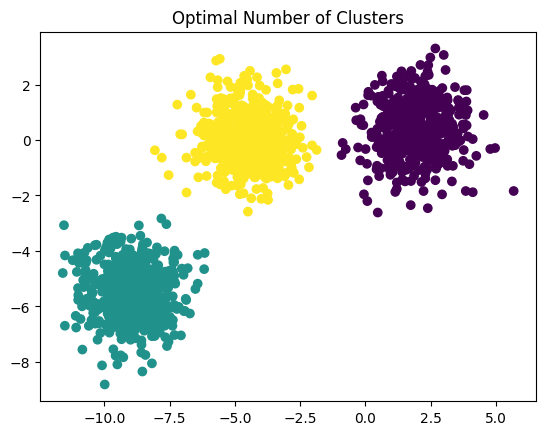

In [3]:
# We simply choose a different number for k

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

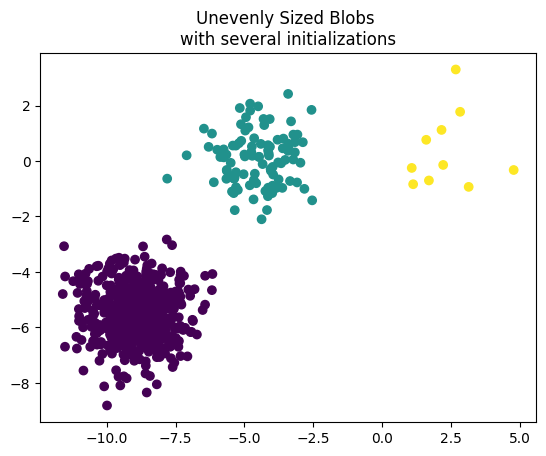

In [4]:
# We run several initializations and the one with lowest Inertia is chosen 

y_pred = KMeans(n_clusters=3, n_init=10, random_state=random_state).fit_predict(
    X_filtered
) 
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs \nwith several initializations") 
plt.show()

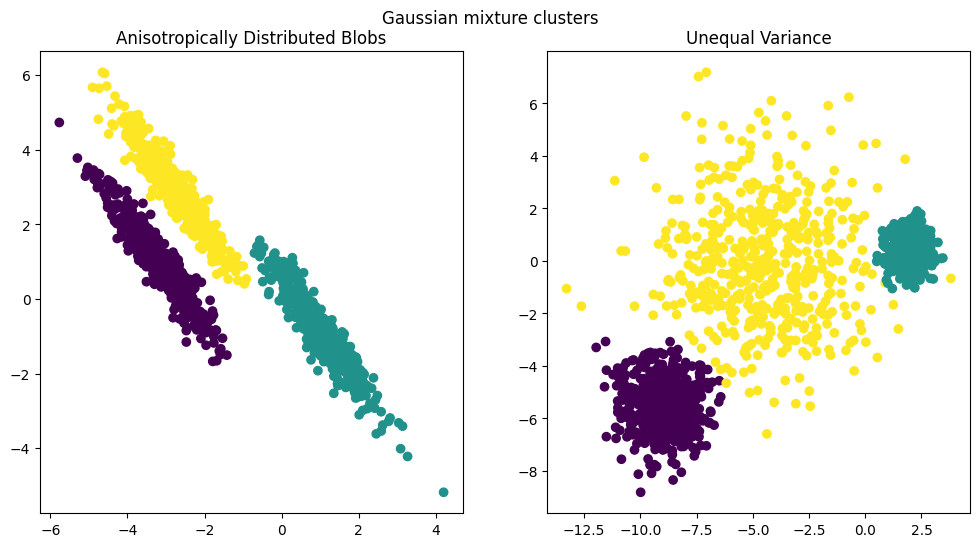

In [5]:
# We need to use different algorithms, k-means is not efficient. In this case we use a Gaussian mixture one 

from sklearn.mixture import GaussianMixture

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

y_pred = GaussianMixture(n_components=3).fit_predict(X_aniso)
ax1.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
ax1.set_title("Anisotropically Distributed Blobs")

y_pred = GaussianMixture(n_components=3).fit_predict(X_varied)
ax2.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
ax2.set_title("Unequal Variance")

plt.suptitle("Gaussian mixture clusters").set_y(0.95)
plt.show()